<a href="https://colab.research.google.com/github/alfiyafatima09/heuristic_algorithms/blob/main/algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import heapq
import time
import psutil
import numpy as np

# A* Algorithm with additional metrics
def a_star(grid, start, goal):
    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    open_list = []
    heapq.heappush(open_list, (0, start))

    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}
    came_from = {}
    nodes_explored = 0  # Initialize counter for nodes explored

    while open_list:
        _, current = heapq.heappop(open_list)
        nodes_explored += 1  # Increment nodes explored

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path, nodes_explored

        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])
            if 0 <= neighbor[0] < len(grid) and 0 <= neighbor[1] < len(grid[0]) and grid[neighbor[0]][neighbor[1]] == 0:
                tentative_g_score = g_score[current] + 1
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))
    return None, nodes_explored

# Function to measure max memory usage
def measure_max_memory(func, *args):
    process = psutil.Process()
    max_memory = 0
    current_memory = process.memory_info().rss / (1024 * 1024)  # Memory in MB
    max_memory = max(max_memory, current_memory)

    result = func(*args)

    current_memory = process.memory_info().rss / (1024 * 1024)
    max_memory = max(max_memory, current_memory)

    return max_memory, result

# Time measurement
start_time = time.time()
grid = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
]

start = (0, 0)
goal = (9, 9)

max_memory, result = measure_max_memory(a_star, grid, start, goal)
end_time = time.time()

path, nodes_explored = result
time_taken = end_time - start_time

# Print results
print("A* Path:", path)
print("Nodes Explored:", nodes_explored)
print("Path Length:", len(path) if path else "No Path Found")
print("Time Taken: {:.5f} seconds".format(time_taken))
print("Memory Used: {:.5f} MB".format(max_memory))


A* Path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]
Nodes Explored: 57
Path Length: 19
Time Taken: 0.00124 seconds
Memory Used: 108.46484 MB


In [3]:
import time
import psutil
import numpy as np

# Greedy Best-First Search Algorithm with additional metrics and visited nodes prevention
def greedy_best_first(grid, start, goal):
    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    open_list = [start]
    closed_list = set()
    nodes_explored = 0  # Initialize counter for nodes explored
    path = []  # Path initialized to empty list
    visited = set()  # Set to track visited nodes
    visited.add(start)  # Mark the start as visited
    parent = {}  # Initialize parent dictionary to track the path

    while open_list:
        # Get the node with the smallest heuristic value (Greedy approach)
        current = min(open_list, key=lambda node: heuristic(node, goal))

        open_list.remove(current)
        closed_list.add(current)

        # If we reached the goal, trace the path
        if current == goal:
            path.append(current)
            while current != start:
                current = parent[current]
                path.append(current)
            path.reverse()
            return path, nodes_explored

        # Explore neighbors
        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])

            # Check if neighbor is within bounds and walkable (not an obstacle)
            if 0 <= neighbor[0] < len(grid) and 0 <= neighbor[1] < len(grid[0]) and grid[neighbor[0]][neighbor[1]] == 0:
                if neighbor not in visited and neighbor not in closed_list:
                    visited.add(neighbor)
                    open_list.append(neighbor)
                    parent[neighbor] = current
                    nodes_explored += 1

    return None, nodes_explored  # No path found if the open list is empty

# Function to measure max memory usage
def measure_max_memory(func, *args):
    process = psutil.Process()
    max_memory = 0
    current_memory = process.memory_info().rss / (1024 * 1024)  # Memory in MB
    max_memory = max(max_memory, current_memory)

    result = func(*args)

    current_memory = process.memory_info().rss / (1024 * 1024)
    max_memory = max(max_memory, current_memory)

    return max_memory, result

# Time measurement
start_time = time.time()

grid = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
]

start = (0, 0)
goal = (9, 9)

max_memory, result = measure_max_memory(greedy_best_first, grid, start, goal)
end_time = time.time()

path, nodes_explored = result
time_taken = end_time - start_time

# Print results
print("Greedy Best-First Search Path:", path)
print("Nodes Explored:", nodes_explored)
print("Path Length:", len(path) if path else "No Path Found")
print("Time Taken: {:.5f} seconds".format(time_taken))
print("Memory Used: {:.5f} MB".format(max_memory))


Greedy Best-First Search Path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]
Nodes Explored: 22
Path Length: 19
Time Taken: 0.00125 seconds
Memory Used: 100.97266 MB


In [4]:
import time
import psutil
import numpy as np

# Hill Climbing Algorithm with additional metrics and visited nodes prevention
def hill_climbing(grid, start, goal):
    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    current = start
    nodes_explored = 0  # Initialize counter for nodes explored
    path = [current]  # Path initialized to the start node
    visited = set()  # Set to track visited nodes
    visited.add(current)  # Mark the start as visited

    while current != goal:
        neighbors = []
        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])

            # Check if neighbor is within bounds and walkable (not an obstacle)
            if 0 <= neighbor[0] < len(grid) and 0 <= neighbor[1] < len(grid[0]) and grid[neighbor[0]][neighbor[1]] == 0:
                neighbors.append(neighbor)

        if not neighbors:
            return None, nodes_explored  # No valid neighbors, no solution

        # Choose the neighbor with the lowest heuristic value (Greedy best choice)
        next_node = min(neighbors, key=lambda neighbor: heuristic(neighbor, goal))

        if next_node in visited:
            break  # To avoid going in loops, stop if we revisit a node

        current = next_node
        path.append(current)
        visited.add(current)
        nodes_explored += 1

    return path, nodes_explored

# Function to measure max memory usage
def measure_max_memory(func, *args):
    process = psutil.Process()
    max_memory = 0
    current_memory = process.memory_info().rss / (1024 * 1024)  # Memory in MB
    max_memory = max(max_memory, current_memory)

    result = func(*args)

    current_memory = process.memory_info().rss / (1024 * 1024)
    max_memory = max(max_memory, current_memory)

    return max_memory, result

# Time measurement
start_time = time.time()

grid = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
]

start = (0, 0)
goal = (9, 9)

max_memory, result = measure_max_memory(hill_climbing, grid, start, goal)
end_time = time.time()

path, nodes_explored = result
time_taken = end_time - start_time

# Print results
print("Hill Climbing Path:", path)
print("Nodes Explored:", nodes_explored)
print("Path Length:", len(path) if path else "No Path Found")
print("Time Taken: {:.5f} seconds".format(time_taken))
print("Memory Used: {:.5f} MB".format(max_memory))


Hill Climbing Path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]
Nodes Explored: 18
Path Length: 19
Time Taken: 0.00151 seconds
Memory Used: 100.97266 MB


<ipython-input-14-c77412769600>:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(algorithm_names, rotation=45)


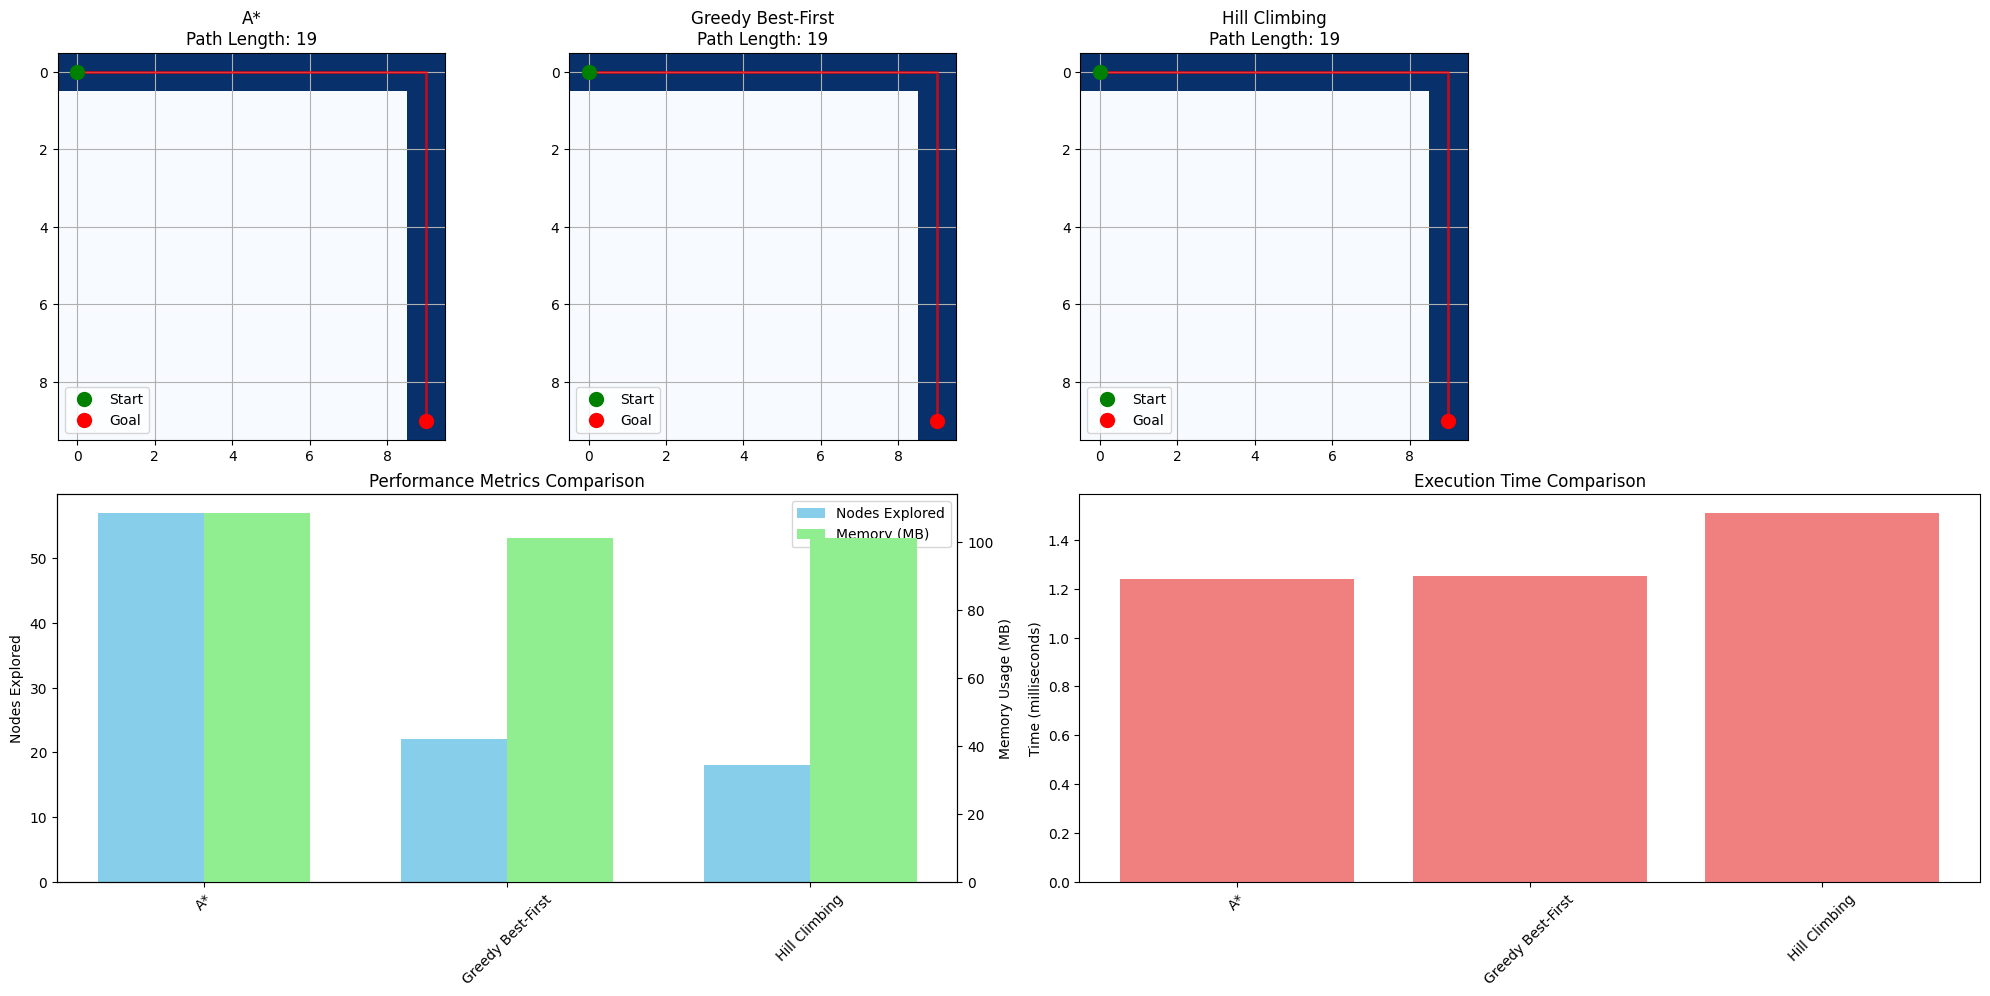

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_path_comparison(grid, paths, algorithm_names, metrics):
    """
    Create a comprehensive visualization comparing different pathfinding algorithms
    """
    # Setup the main figure
    plt.figure(figsize=(20, 10))

    # Create subplot layout
    gs = plt.GridSpec(2, 4)

    # Plot paths for each algorithm
    for idx, (path, name) in enumerate(zip(paths, algorithm_names)):
        ax = plt.subplot(gs[0, idx])
        visualize_single_path(grid, path, name, ax)

    # Create bar plots for metrics
    ax_metrics = plt.subplot(gs[1, :2])
    plot_metrics_comparison(metrics, algorithm_names, ax_metrics)

    # Create timing plot
    ax_time = plt.subplot(gs[1, 2:])
    plot_timing_comparison(metrics, algorithm_names, ax_time)

    plt.tight_layout()

def visualize_single_path(grid, path, algorithm_name, ax):
    """Plot single algorithm path"""
    # Create a colormap for the grid
    grid_colors = np.zeros_like(grid, dtype=float)
    grid_colors[grid == 1] = 0.3  # Obstacles

    # Mark the path
    for x, y in path:
        grid_colors[x, y] = 0.7

    # Plot the grid
    ax.imshow(grid_colors, cmap='Blues')

    # Plot the path line
    path = np.array(path)
    ax.plot(path[:, 1], path[:, 0], 'r-', linewidth=2, alpha=0.7)

    # Mark start and end points
    ax.plot(path[0, 1], path[0, 0], 'go', label='Start', markersize=10)
    ax.plot(path[-1, 1], path[-1, 0], 'ro', label='Goal', markersize=10)

    ax.grid(True)
    ax.set_title(f'{algorithm_name}\nPath Length: {len(path)}')
    ax.legend()

def plot_metrics_comparison(metrics, algorithm_names, ax):
    """Plot performance metrics comparison"""
    x = np.arange(len(algorithm_names))
    width = 0.35

    # Plot nodes explored
    ax.bar(x - width/2, [metrics[alg]['nodes_explored'] for alg in algorithm_names],
           width, label='Nodes Explored', color='skyblue')

    # Plot memory usage
    ax2 = ax.twinx()
    ax2.bar(x + width/2, [metrics[alg]['memory'] for alg in algorithm_names],
            width, label='Memory (MB)', color='lightgreen')

    ax.set_ylabel('Nodes Explored')
    ax2.set_ylabel('Memory Usage (MB)')
    ax.set_title('Performance Metrics Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(algorithm_names, rotation=45)

    # Add legends
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

def plot_timing_comparison(metrics, algorithm_names, ax):
    """Plot timing comparison"""
    times = [metrics[alg]['time'] * 1000 for alg in algorithm_names]  # Convert to milliseconds

    ax.bar(algorithm_names, times, color='lightcoral')
    ax.set_ylabel('Time (milliseconds)')
    ax.set_title('Execution Time Comparison')
    ax.set_xticklabels(algorithm_names, rotation=45)

# Example usage
grid = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
]

# Sample path (all algorithms found the same path in this case)
path = [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9),
        (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]

paths = [path, path, path]  # Same path for all algorithms in this case
algorithm_names = ['A*', 'Greedy Best-First', 'Hill Climbing']

# Metrics from your results
metrics = {
    'A*': {
        'nodes_explored': 57,
        'memory': 108.46,
        'time': 0.00124
    },
    'Greedy Best-First': {
        'nodes_explored': 22,
        'memory': 100.97,
        'time': 0.00125
    },
    'Hill Climbing': {
        'nodes_explored': 18,
        'memory': 100.97,
        'time': 0.00151
    }
}

# Create visualization
visualize_path_comparison(grid, paths, algorithm_names, metrics)
plt.show()

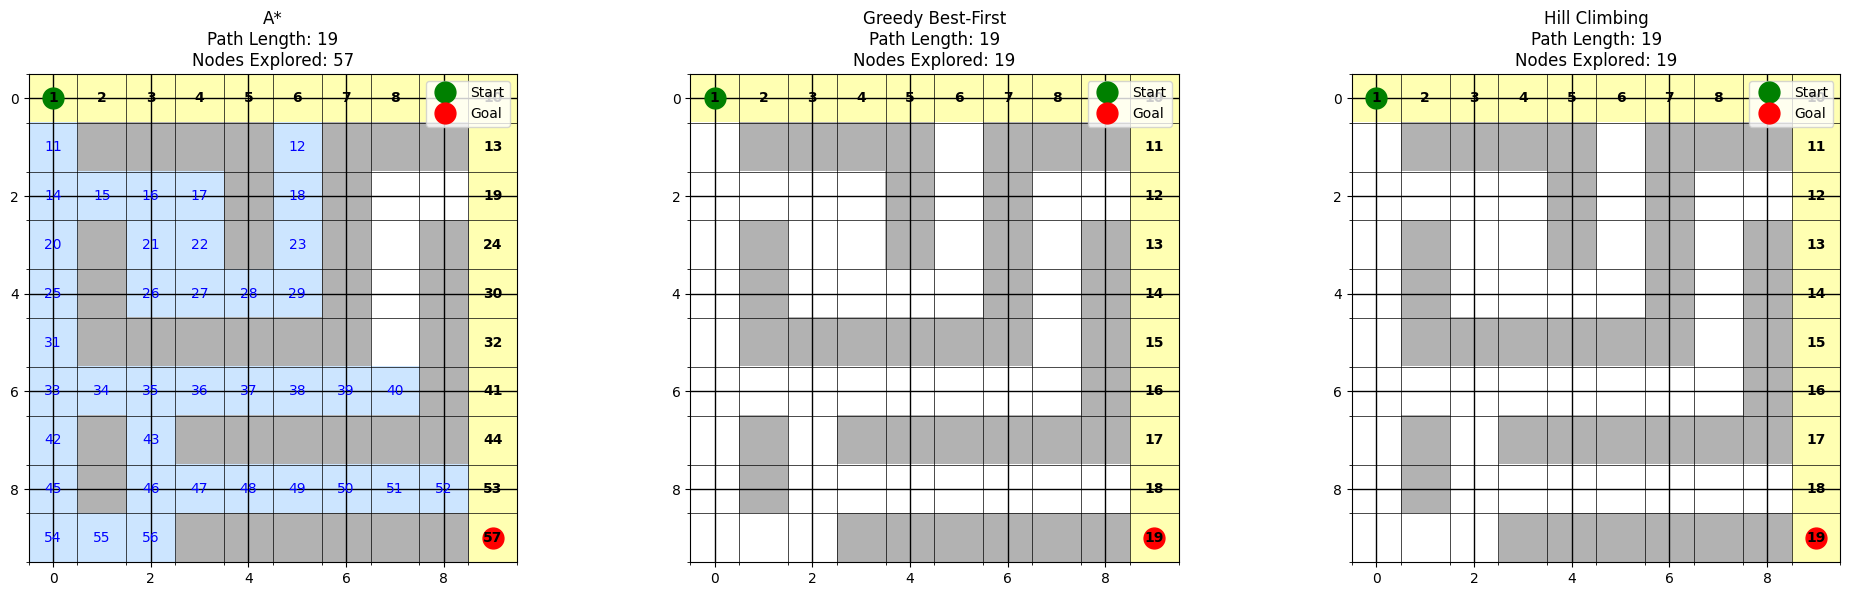

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from heapq import heappush, heappop
from collections import defaultdict

class PathFinder:
    def __init__(self, grid):
        self.grid = grid
        self.rows = len(grid)
        self.cols = len(grid[0])

    def get_neighbors(self, pos):
        row, col = pos
        neighbors = []
        for dr, dc in [(0, 1), (1, 0), (0, -1), (-1, 0)]:  # right, down, left, up
            r, c = row + dr, col + dc
            if (0 <= r < self.rows and 0 <= c < self.cols and
                self.grid[r][c] != 1):
                neighbors.append((r, c))
        return neighbors

    def manhattan_distance(self, pos1, pos2):
        return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])

    def astar(self, start, goal):
        frontier = [(0, start)]
        came_from = {start: None}
        cost_so_far = {start: 0}
        exploration_order = []

        while frontier:
            current = heappop(frontier)[1]
            exploration_order.append(current)

            if current == goal:
                break

            for next_pos in self.get_neighbors(current):
                new_cost = cost_so_far[current] + 1
                if next_pos not in cost_so_far or new_cost < cost_so_far[next_pos]:
                    cost_so_far[next_pos] = new_cost
                    priority = new_cost + self.manhattan_distance(goal, next_pos)
                    heappush(frontier, (priority, next_pos))
                    came_from[next_pos] = current

        # Reconstruct path
        path = []
        current = goal
        while current is not None:
            path.append(current)
            current = came_from.get(current)
        path.reverse()

        return path, exploration_order

    def greedy_best_first(self, start, goal):
        frontier = [(self.manhattan_distance(start, goal), start)]
        came_from = {start: None}
        exploration_order = []

        while frontier:
            current = heappop(frontier)[1]
            exploration_order.append(current)

            if current == goal:
                break

            for next_pos in self.get_neighbors(current):
                if next_pos not in came_from:
                    priority = self.manhattan_distance(next_pos, goal)
                    heappush(frontier, (priority, next_pos))
                    came_from[next_pos] = current

        path = []
        current = goal
        while current is not None:
            path.append(current)
            current = came_from.get(current)
        path.reverse()

        return path, exploration_order

    def hill_climbing(self, start, goal):
        current = start
        path = [current]
        exploration_order = [current]
        visited = {current}

        while current != goal:
            neighbors = self.get_neighbors(current)
            next_pos = min(neighbors,
                          key=lambda x: self.manhattan_distance(x, goal) if x not in visited else float('inf'),
                          default=None)

            if next_pos is None or next_pos in visited:
                break

            current = next_pos
            path.append(current)
            exploration_order.append(current)
            visited.add(current)

        return path, exploration_order

def visualize_all_algorithms(grid, start, goal):
    pathfinder = PathFinder(grid)

    # Get paths and exploration orders for each algorithm
    astar_path, astar_explored = pathfinder.astar(start, goal)
    greedy_path, greedy_explored = pathfinder.greedy_best_first(start, goal)
    hill_path, hill_explored = pathfinder.hill_climbing(start, goal)

    paths = [astar_path, greedy_path, hill_path]
    explored_sets = [astar_explored, greedy_explored, hill_explored]
    names = ['A*', 'Greedy Best-First', 'Hill Climbing']

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    for idx, (path, explored, name, ax) in enumerate(zip(paths, explored_sets, names, axes)):
        # Create colored grid
        grid_colors = np.ones((len(grid), len(grid[0]), 3))

        # Color obstacles
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j] == 1:
                    grid_colors[i, j] = [0.7, 0.7, 0.7]  # Gray for obstacles

        # Color explored nodes in light blue
        for sequence_num, node in enumerate(explored, 1):
            if node not in path:
                grid_colors[node[0], node[1]] = [0.8, 0.9, 1.0]  # Light blue
                ax.text(node[1], node[0], str(sequence_num),
                       ha='center', va='center', color='blue')

        # Color path nodes in yellow
        for node in path:
            grid_colors[node[0], node[1]] = [1.0, 1.0, 0.7]  # Light yellow

        # Number the path nodes
        for sequence_num, node in enumerate(explored, 1):
            if node in path:
                ax.text(node[1], node[0], str(sequence_num),
                       ha='center', va='center', color='black',
                       fontweight='bold')

        # Plot grid
        ax.imshow(grid_colors)

        # Mark start and goal
        ax.plot(start[1], start[0], 'go', markersize=15, label='Start')
        ax.plot(goal[1], goal[0], 'ro', markersize=15, label='Goal')

        # Grid styling
        ax.grid(True, which='major', color='black', linewidth=1)
        ax.set_xticks(np.arange(-0.5, len(grid[0]), 1), minor=True)
        ax.set_yticks(np.arange(-0.5, len(grid), 1), minor=True)
        ax.grid(True, which='minor', color='black', linewidth=0.5)

        # Title and labels
        ax.set_title(f'{name}\nPath Length: {len(path)}\nNodes Explored: {len(explored)}')
        ax.legend(loc='upper right')

    plt.tight_layout()
    return fig

# Example usage
grid = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
]

start = (0, 0)  # Top-left corner
goal = (9, 9)   # Bottom-right corner

# Create and show visualization
fig = visualize_all_algorithms(grid, start, goal)
plt.show()